# Estimating variance

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from dpmmlearn import DPMM
from dpmmlearn.probability import InvGamma

## Prepare data

In [2]:
def gaussian_sample(mu_list, var_list, size, portion, random_seed=0):
    np.random.seed(random_seed)
    nums = np.random.multinomial(size, portion)
    xs = []
    for mu, var, num in zip(mu_list, var_list, nums):
        x = np.random.normal(loc=mu, scale=np.sqrt(var), size=num)
        xs.append(x)
    xs = np.concatenate(xs)
    return xs


def sample_pdf(x, mu_list, var_list, portion):
    y = np.zeros_like(x)
    for mu, var, num in zip(mu_list, var_list, portion):
        y_ = np.exp(-0.5*(x-mu)**2/var)/np.sqrt(2*np.pi*var)
        y += num/sum(portion) * y_
    return y


def result_pdf(x, thetas, n_labels, mu):
    y = np.zeros_like(x)
    for theta, n_label in zip(thetas, n_labels):
        var = theta
        y_ = np.exp(-0.5*(x-mu)**2/var)/np.sqrt(2*np.pi*var)
        y += n_label/sum(n_labels) * y_
    return y

In [3]:
size = 800
mu_list = [0.0, 0.0]  # means
var_list = [0.3**2, 0.05**2]  # variances
portion = [0.5, 0.5,]  # proportions

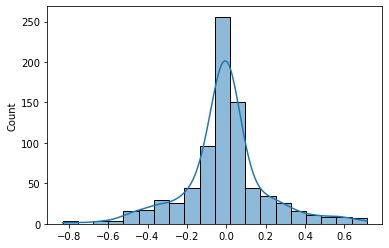

In [4]:
X = gaussian_sample(mu_list, var_list, size, portion)
sns.histplot(X, bins=20,kde=True)
plt.show()

## Model

Use the Inverse Gamma prior for a Gaussian with known mean and unknown variance.

In [5]:
mu = 0.0
alpha = 1.0
beta = 100.0
prob = InvGamma(alpha, beta, mu)

dp_alpha = 0.1 # Dirichlet Process clustering parameter.  Set lower to infer fewer components.
model = DPMM(prob, dp_alpha, max_iter=500)

model.fit(X)

iter=init -- New label created: 0
iter=init -- New label created: 1
iter=2 -- New label created: 2
iter=4 -- New label created: 3
iter=5 -- Label deleted: 2
iter=5 -- Label deleted: 2
iter=9 -- New label created: 2
iter=11 -- Label deleted: 2
iter=75 -- New label created: 2
iter=76 -- Label deleted: 2
iter=83 -- New label created: 2
iter=84 -- Label deleted: 2
iter=90 -- New label created: 2
iter=94 -- New label created: 3
iter=99 -- New label created: 4
iter=100 -- Label deleted: 3
iter=100 -- Label deleted: 3
iter=104 -- New label created: 3
iter=105 -- Label deleted: 3
iter=126 -- New label created: 3
iter=127 -- Label deleted: 3
iter=132 -- New label created: 3
iter=137 -- New label created: 4
iter=139 -- Label deleted: 3
iter=147 -- Label deleted: 3
iter=152 -- New label created: 3
iter=152 -- New label created: 4
iter=154 -- Label deleted: 4
iter=154 -- Label deleted: 3
iter=162 -- New label created: 3
iter=165 -- Label deleted: 3
iter=170 -- New label created: 3
iter=171 -- Labe

DPMM(alpha=0.1, prob=InvGamma(alpha=1.0, beta=100.0, mu=0.0))

In [6]:
print(var_list, portion)
print(model.thetas_, [k/sum(model.n_labels_) for k in model.n_labels_])

[0.09, 0.0025000000000000005] [0.5, 0.5]
[0.0023113196965478277, 0.08728171371349017] [0.495, 0.505]


In [7]:
x = np.arange(-2, 2, 0.01)
y_true = sample_pdf(x, mu_list, var_list, portion)
y_pred = result_pdf(x, model.thetas_, model.n_labels_, mu)

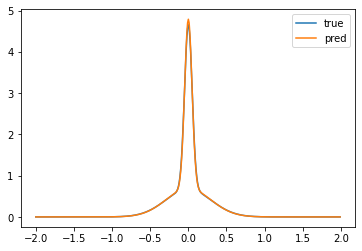

In [8]:
plt.plot(x, y_true, label='true')
plt.plot(x, y_pred, label='pred')
plt.legend()
plt.show()